In [552]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [553]:
import numpy as np
import pickle
from matplotlib import pyplot
from sklearn.model_selection import KFold
import warnings
import pandas as pd

warnings.filterwarnings("ignore")
%matplotlib inline
%tensorflow_version 1.x

In [554]:
import tensorflow as tf
print(tf.__version__)

1.15.2


In [555]:
#Function Definition
def add_layer(inputs, in_size, out_size, activation_function=None):
  Weights = tf.Variable(tf.random_normal([in_size, out_size])) #in_size - rows  out_size - columns
  biases = tf.Variable(tf.zeros([1, out_size]) + 0.1) #one row
  Wx_plus_b = tf.matmul(inputs, Weights) + biases
  if activation_function is None:
    outputs = Wx_plus_b
  else:
    outputs = activation_function(Wx_plus_b)
  return outputs

In [556]:
# 1、Load Data and Do Preprocessing
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine Learning/Iris_Dataset.csv')
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [557]:
dataset = pd.get_dummies(dataset, columns=['Species']) # One Hot Encoding
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,0,0,1
146,147,6.3,2.5,5.0,1.9,0,0,1
147,148,6.5,3.0,5.2,2.0,0,0,1
148,149,6.2,3.4,5.4,2.3,0,0,1


In [558]:
values = list(dataset.columns.values) # Get the column names into a list

y = dataset[values[-3:]]
y = np.array(y, dtype='float32') # Get labels

X = dataset[values[1:-3]]
X = np.array(X, dtype='float32') # Get features

In [559]:
# Shuffle Data
indices = np.random.choice(len(X), len(X), replace=False)
X_values = X[indices]
y_values = y[indices]

In [560]:
# Create A Training Set, A Validation Set And A Testing Set
test_size = 30
#validation_size = 20

X_train = X_values[: -test_size]  #120
y_train = y_values[: -test_size]  #120

#X_validation = X_values[-(test_size + validation_size) : -test_size]  #20
#y_validation = y_values[-(test_size + validation_size) : -test_size]  #20

X_test = X_values[-test_size:]  #30
y_test = y_values[-test_size:]  #30

In [561]:
# 2. Build Artificial Neural Network

#Parameter Settings
interval = 50
epochNum = 1000
hidden_layer_nodes = 8

# Initialize Input Layer (placeholders)
xs = tf.placeholder(shape=[None, 4], dtype=tf.float32)
ys = tf.placeholder(shape=[None, 3], dtype=tf.float32)

# Create Hidden Layers
l1 = add_layer(xs, 4, 8, activation_function=tf.nn.relu)

# Create Output Layer
prediction = add_layer(l1, 8, 3, activation_function=tf.nn.softmax)

# Cost Function
loss = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction + 1e-10), axis=0)) #1e-10 is used to avoid NaN

# Optimizer & Train Step
train_step = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

# Global Variables Initializer
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

In [562]:
# # 3. Train Artificial Neural Network
# for i in range(epoch+1):
#   # training
#   sess.run(train_step, feed_dict={xs:X_train, ys: y_train})
#   train_loss = sess.run(loss, feed_dict={xs: X_train, ys: y_train})
#   if i % interval == 0:
#     # to see the improvement
#     print("Epoch %d, loss: %s"  % (i, train_loss))

Fold 1:
Epoch 0, training loss: 349.82327, validation loss: 26.9561
Epoch 50, training loss: 23.046751, validation loss: 3.1437428
Epoch 100, training loss: 11.202579, validation loss: 1.3218516
Epoch 150, training loss: 8.23678, validation loss: 0.8470631
Epoch 200, training loss: 6.448868, validation loss: 0.5361488
Epoch 250, training loss: 5.612843, validation loss: 0.3957866
Epoch 300, training loss: 5.068899, validation loss: 0.32532373
Epoch 350, training loss: 4.665893, validation loss: 0.27598405
Epoch 400, training loss: 4.3578153, validation loss: 0.23939814
Epoch 450, training loss: 4.1155534, validation loss: 0.21147712
Epoch 500, training loss: 3.9205582, validation loss: 0.18960802
Epoch 550, training loss: 3.7607224, validation loss: 0.17200792
Epoch 600, training loss: 3.6280506, validation loss: 0.15768473
Epoch 650, training loss: 3.515975, validation loss: 0.1459201
Epoch 700, training loss: 3.4199588, validation loss: 0.13604592
Epoch 750, training loss: 3.33685, v

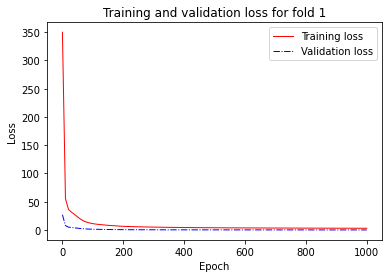

<Figure size 432x288 with 0 Axes>

-----------------------------------------------------------------------


Fold 2:
Epoch 0, training loss: 358.64148, validation loss: 29.463102
Epoch 50, training loss: 6.0433593, validation loss: 0.50989115
Epoch 100, training loss: 5.041091, validation loss: 0.38450316
Epoch 150, training loss: 4.5324936, validation loss: 0.31966564
Epoch 200, training loss: 4.207833, validation loss: 0.27915922
Epoch 250, training loss: 3.978843, validation loss: 0.25088352
Epoch 300, training loss: 3.8075364, validation loss: 0.23017931
Epoch 350, training loss: 3.6741955, validation loss: 0.21461676
Epoch 400, training loss: 3.568133, validation loss: 0.2025494
Epoch 450, training loss: 3.4811223, validation loss: 0.19290905
Epoch 500, training loss: 3.4079723, validation loss: 0.18500243
Epoch 550, training loss: 3.3452272, validation loss: 0.17843507
Epoch 600, training loss: 3.2906606, validation loss: 0.17289126
Epoch 650, training loss: 3.2426617, validation loss: 0.16829646
Epoch 700, traini

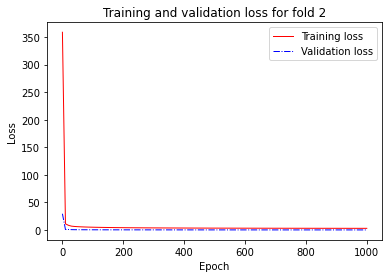

<Figure size 432x288 with 0 Axes>

-----------------------------------------------------------------------


Fold 3:
Epoch 0, training loss: 442.99142, validation loss: 21.98295
Epoch 50, training loss: 42.8947, validation loss: 8.921741
Epoch 100, training loss: 8.25051, validation loss: 2.0014613
Epoch 150, training loss: 5.890784, validation loss: 1.2801877
Epoch 200, training loss: 5.230593, validation loss: 1.1928233
Epoch 250, training loss: 4.7727456, validation loss: 1.1353582
Epoch 300, training loss: 4.436826, validation loss: 1.0890552
Epoch 350, training loss: 4.1873384, validation loss: 1.0520276
Epoch 400, training loss: 3.9921353, validation loss: 1.0193554
Epoch 450, training loss: 3.8342533, validation loss: 0.99074954
Epoch 500, training loss: 3.7038429, validation loss: 0.96505684
Epoch 550, training loss: 3.5943203, validation loss: 0.94159555
Epoch 600, training loss: 3.5010788, validation loss: 0.9200952
Epoch 650, training loss: 3.4208126, validation loss: 0.90034634
Epoch 700, training loss: 3.35

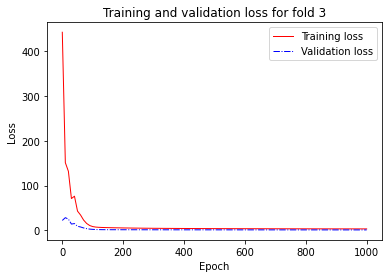

<Figure size 432x288 with 0 Axes>

-----------------------------------------------------------------------


Fold 4:
Epoch 0, training loss: 111.99673, validation loss: 15.684661
Epoch 50, training loss: 20.975454, validation loss: 1.6486846
Epoch 100, training loss: 16.469103, validation loss: 1.1884705
Epoch 150, training loss: 14.084689, validation loss: 0.9076788
Epoch 200, training loss: 11.973465, validation loss: 0.6842101
Epoch 250, training loss: 9.929309, validation loss: 0.5180497
Epoch 300, training loss: 7.9863625, validation loss: 0.41089532
Epoch 350, training loss: 6.354593, validation loss: 0.35892484
Epoch 400, training loss: 5.350081, validation loss: 0.34241867
Epoch 450, training loss: 4.77791, validation loss: 0.33625135
Epoch 500, training loss: 4.4273076, validation loss: 0.31996873
Epoch 550, training loss: 4.1675243, validation loss: 0.29717615
Epoch 600, training loss: 3.9607222, validation loss: 0.27416626
Epoch 650, training loss: 3.7919674, validation loss: 0.25366545
Epoch 700, training lo

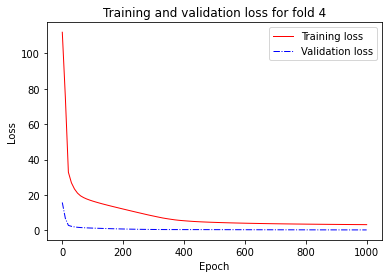

<Figure size 432x288 with 0 Axes>

-----------------------------------------------------------------------


Fold 5:
Epoch 0, training loss: 614.023, validation loss: 46.0517
Epoch 50, training loss: 614.023, validation loss: 46.0517
Epoch 100, training loss: 614.023, validation loss: 46.0517
Epoch 150, training loss: 614.023, validation loss: 46.0517
Epoch 200, training loss: 614.023, validation loss: 46.0517
Epoch 250, training loss: 614.023, validation loss: 46.0517
Epoch 300, training loss: 614.023, validation loss: 46.0517
Epoch 350, training loss: 614.023, validation loss: 46.0517
Epoch 400, training loss: 614.023, validation loss: 46.0517
Epoch 450, training loss: 614.023, validation loss: 46.0517
Epoch 500, training loss: 614.023, validation loss: 46.0517
Epoch 550, training loss: 614.023, validation loss: 46.0517
Epoch 600, training loss: 614.023, validation loss: 46.0517
Epoch 650, training loss: 614.023, validation loss: 46.0517
Epoch 700, training loss: 614.023, validation loss: 46.0517
Epoch 750, training l

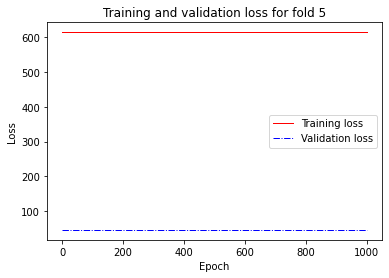

<Figure size 432x288 with 0 Axes>

-----------------------------------------------------------------------


Fold 6:
Epoch 0, training loss: 255.77618, validation loss: 25.89638
Epoch 50, training loss: 20.111937, validation loss: 2.6259825
Epoch 100, training loss: 13.094525, validation loss: 1.9235302
Epoch 150, training loss: 10.761405, validation loss: 1.7803892
Epoch 200, training loss: 9.341361, validation loss: 1.6928228
Epoch 250, training loss: 8.33746, validation loss: 1.6193447
Epoch 300, training loss: 7.5742116, validation loss: 1.5533776
Epoch 350, training loss: 6.965004, validation loss: 1.4915028
Epoch 400, training loss: 6.4634705, validation loss: 1.433108
Epoch 450, training loss: 6.042439, validation loss: 1.3779129
Epoch 500, training loss: 5.6840205, validation loss: 1.3260183
Epoch 550, training loss: 5.375704, validation loss: 1.2773517
Epoch 600, training loss: 5.107648, validation loss: 1.231319
Epoch 650, training loss: 4.8723187, validation loss: 1.1875455
Epoch 700, training loss: 4.664408,

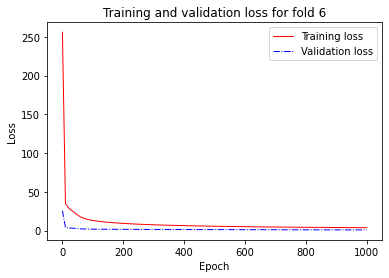

<Figure size 432x288 with 0 Axes>

-----------------------------------------------------------------------


Fold 7:
Epoch 0, training loss: 302.5004, validation loss: 23.02591
Epoch 50, training loss: 9.931949, validation loss: 0.94054765
Epoch 100, training loss: 7.3098245, validation loss: 0.6650184
Epoch 150, training loss: 6.2820725, validation loss: 0.54650635
Epoch 200, training loss: 5.607344, validation loss: 0.4680004
Epoch 250, training loss: 5.1350207, validation loss: 0.41322407
Epoch 300, training loss: 4.7860346, validation loss: 0.3717703
Epoch 350, training loss: 4.517809, validation loss: 0.3389198
Epoch 400, training loss: 4.305096, validation loss: 0.31202754
Epoch 450, training loss: 4.132062, validation loss: 0.2894372
Epoch 500, training loss: 3.9883463, validation loss: 0.2699764
Epoch 550, training loss: 3.8668969, validation loss: 0.25300503
Epoch 600, training loss: 3.7627518, validation loss: 0.2378981
Epoch 650, training loss: 3.6723273, validation loss: 0.22467637
Epoch 700, training loss: 

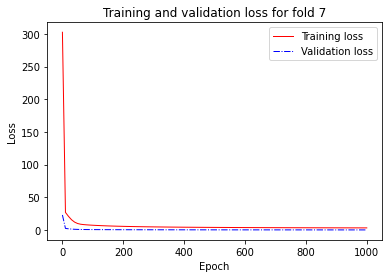

<Figure size 432x288 with 0 Axes>

-----------------------------------------------------------------------


Fold 8:
Epoch 0, training loss: 240.36084, validation loss: 17.001041
Epoch 50, training loss: 16.288263, validation loss: 1.8023577
Epoch 100, training loss: 12.451363, validation loss: 1.3431586
Epoch 150, training loss: 10.077802, validation loss: 1.0622641
Epoch 200, training loss: 8.48656, validation loss: 0.8708132
Epoch 250, training loss: 7.3958993, validation loss: 0.73528916
Epoch 300, training loss: 6.6223655, validation loss: 0.6353174
Epoch 350, training loss: 6.051932, validation loss: 0.55854946
Epoch 400, training loss: 5.6154275, validation loss: 0.49753428
Epoch 450, training loss: 5.2704167, validation loss: 0.44767037
Epoch 500, training loss: 4.990173, validation loss: 0.40601882
Epoch 550, training loss: 4.757464, validation loss: 0.3706429
Epoch 600, training loss: 4.5604324, validation loss: 0.34015393
Epoch 650, training loss: 4.3910356, validation loss: 0.3135988
Epoch 700, training loss

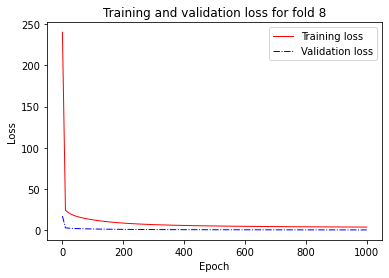

<Figure size 432x288 with 0 Axes>

-----------------------------------------------------------------------


Fold 9:
Epoch 0, training loss: 179.20247, validation loss: 26.405985
Epoch 50, training loss: 11.998279, validation loss: 1.4530402
Epoch 100, training loss: 8.385516, validation loss: 1.2938672
Epoch 150, training loss: 7.0109277, validation loss: 1.1932232
Epoch 200, training loss: 6.1343613, validation loss: 1.1359255
Epoch 250, training loss: 5.5183983, validation loss: 1.1012306
Epoch 300, training loss: 5.0623302, validation loss: 1.0805807
Epoch 350, training loss: 4.7128615, validation loss: 1.0678034
Epoch 400, training loss: 4.4374394, validation loss: 1.059851
Epoch 450, training loss: 4.215613, validation loss: 1.0552487
Epoch 500, training loss: 4.0336447, validation loss: 1.052898
Epoch 550, training loss: 3.882333, validation loss: 1.051689
Epoch 600, training loss: 3.754586, validation loss: 1.0512848
Epoch 650, training loss: 3.6454499, validation loss: 1.0513505
Epoch 700, training loss: 3.5512

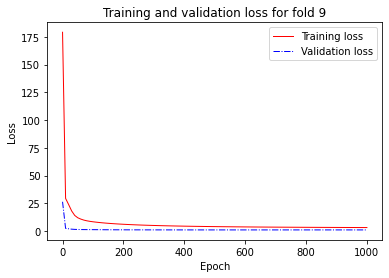

<Figure size 432x288 with 0 Axes>

-----------------------------------------------------------------------


Fold 10:
Epoch 0, training loss: 47.596973, validation loss: 4.7097063
Epoch 50, training loss: 43.773037, validation loss: 4.362953
Epoch 100, training loss: 43.734844, validation loss: 4.3639
Epoch 150, training loss: 43.69246, validation loss: 4.363865
Epoch 200, training loss: 43.662174, validation loss: 4.3629584
Epoch 250, training loss: 43.627575, validation loss: 4.361674
Epoch 300, training loss: 43.611134, validation loss: 4.3604875
Epoch 350, training loss: 43.582108, validation loss: 4.3592887
Epoch 400, training loss: 43.565144, validation loss: 4.3580203
Epoch 450, training loss: 43.49954, validation loss: 4.3561287
Epoch 500, training loss: 43.18387, validation loss: 4.42743
Epoch 550, training loss: 35.212082, validation loss: 3.5880263
Epoch 600, training loss: 28.314466, validation loss: 2.6720932
Epoch 650, training loss: 24.346632, validation loss: 2.231696
Epoch 700, training loss: 21.86635, 

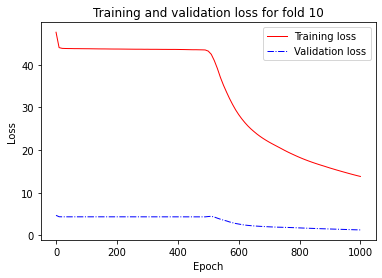

<Figure size 432x288 with 0 Axes>

-----------------------------------------------------------------------




In [563]:
# 3. Train Artificial Neural Network With Cross Validation
kf = KFold(n_splits=10)
fold = 0

for train_index, val_index in kf.split(X_train, y_train):
   sess.run(init)
   train_losses = []
   val_losses = []
   epochs = []
   fold = fold + 1
   print("Fold %s:" % (fold))
   train_x = X_train[train_index]
   train_y = y_train[train_index]
   val_x = X_train[val_index]
   val_y =  y_train[val_index]
  
   for i in range(epochNum+1):
      # Training (train_step)
      sess.run(train_step, feed_dict={xs: X_train, ys: y_train})
      train_loss = sess.run(loss, feed_dict={xs: X_train, ys: y_train})
      val_loss = loss.eval({xs: val_x, ys: val_y}, session=sess)

      if i % 10 == 0:
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        epochs.append(i)
        
      if i % interval == 0:
        print("Epoch %d, training loss: %s, validation loss: %s" % (i, train_loss, val_loss))

   pyplot.plot(epochs, train_losses, 'r', label='Training loss', linewidth=1, linestyle='-')
   pyplot.plot(epochs, val_losses, 'b', label='Validation loss', linewidth=1, linestyle='-.')
   pyplot.xlabel('Epoch') 
   pyplot.ylabel('Loss')
   pyplot.title('Training and validation loss for fold %s' % (fold))
   pyplot.legend()
   pyplot.figure()
   pyplot.show()
   pyplot.ioff() 
   print("-----------------------------------------------------------------------\n\n")





In [564]:
# 4. Testing
pred = tf.argmax(prediction, axis=1)
actual = tf.argmax(y_test, axis=1)
correct = tf.cast(tf.equal(pred, actual), dtype=tf.int32)
correct = tf.reduce_sum(correct)
correctNum = sess.run(correct, feed_dict={xs:X_test})
accuracy = float(correctNum) / float(test_size)
print("The accuracy of testing set is %f" % accuracy)

The accuracy of testing set is 1.000000
